### **Setup to the manager to avoid NameError: Name 'con' is not defined**

In [1]:
# Kod: Engelska
# Kommentarer: Svenska
from pathlib import Path
import duckdb

# hitta db relativt till notebook folder
CWD = Path.cwd() # ..... /lab_sql_DE25_johnny_hyytiainen/notebooks
DB_PATH = CWD.parent / "db" / "sakila.duckdb"

print("Using Database:", DB_PATH, "Exists?", DB_PATH.exists())

con=duckdb.connect(str(DB_PATH))
con.sql("SHOW TABLES").df()

Using Database: c:\Users\johnn\Desktop\labs\lab_sql_DE25_johnny_hyytiainen\db\sakila.duckdb Exists? True


,name


# SQL lab - Task 1. Exploratory Data Analysis (EDA) of the sakila database.


## Task 1 assignments:

 - **A)** Which movies are longer than 3 hours (180 minutes), show the title and its length?

 - **B)** Which movies have the word "love" in its title? Show the following columns:
    - title.
    - rating.
    - lenght.
    - description.

 - **C)** Calculate descriptive statistics on the length column, **The Manager wants:**
    - shortest.
    - average.
    - median.
    - longest movie length.

 - **D)** The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can keep the movie.
 - **The Manager wants to know**
    - the 10 most expensive movies to rent per day.


 - **E)** Which actors have played in most movies?
    - Show the top 10 actors with the number of movies they have played in.

 - **F)**
   - Now it's time for you to choose your own question to explore the sakila database! Write down your **own** questions you want to answer and then answer them using pandas and duckdb.

- **F.1)** 
   - What is the **Revenue** per genre?
   - Narrow it down to our top 5 genres.

- **F.2)**
   - What is the **Customer Lifetime Value?** 
   - Find **our MOST valuable customers**
    - Find their **customer_id**, the customers **FULL NAME**, how many times they have rented from us and their **total money spent by using our services**
   - **LIMIT** the search down to our top 10 most **Valuable customers**


- **F.3)**
   - Take a look in to our store performance. What is the **revenue per store?**

- **F.4)**
  - Take a look into **seasonal trends** and find out which months are the most profitable.

- **F.5)**
  - Take a look into which movies are **underperforming** and just taking up space on our shelves.
  - IF we have rentals in stock that aren't in circulation, the managing team and the Manager needs to know this.

- **F.6)**
  - **IF YOU CANT** find rentals that are unutilized in question F.5, increase the search from 0 -> 1 -> 2... ... until you find underperforming titles and come back with the answer.


### TASK 1 - A)
**Question A):**
- Which movies are longer than 3 hours (180 minutes), show the title and its length?

**Answer A):**
  - 39 movies longer than 180 minutes. Organized from longest -> falling count
    - Longest one is: **WORST BANGER**
    - **Show top 15 results**

In [2]:
# Kod: Engelska
# Kommentarer : Svenska
query_a = """
SELECT 
    title,
    length
FROM staging.film
WHERE length > 180
ORDER BY length DESC;
"""
# egen variabel för att även printa ut svaret. variabel = con.sql(query_a).dataframe()
df_a = con.sql(query_a).df()

print(f"Movies longer than 3 hours(180min): {len(df_a)}")
df_a.head(15)

Movies longer than 3 hours(180min): 39


,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


### TASK 1 - B)
**Question B):**
- Which movies have the word "love" in its title? Show the following columns
    * Title
    * Rating
    * Lenght
    * Description

**Answer B):** 
  - 10 movies with the word 'love' in the title.

    - using %love% to filter and normalize so to NOT miss any title.
    - For example: 
    - **Graffiti Love** and **Strangelove Desires**
    - WITHOUT normalization I would have **MISSED** Strange**love** in the list.


In [3]:
# Kod: Engelska
# Kommentarer : Svenska

query_b = """
SELECT 
    title,
    rating,
    length,
    description
FROM staging.film
WHERE LOWER(title) LIKE '%love%'  
ORDER BY title;
"""
# Egen variabel för query b att kalla på för att printa ut hur många antal filmer med 'love' i titeln.
# %love% för att normalisera och filtrera allting till lower för att inte missa någonting.
# T.ex "Graffiti Love" vs "Strangelove Desire"
df_b = con.sql(query_b).df()

print(f"Number of movies with the word 'love' in the title: {len(df_b)}")
df_b

Number of movies with the word 'love' in the title: 10


,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


### TASK 1 - C)
**Question C):** 
- Calculate descriptive statistics on the length column.
    - Shortest.
    - Average.
    - Median.
    - Longest movie length.

**Answer C):**
- Shortest = 40
- Average = 115.27 (ROUND to 2 decimals since 115.272 has no meaning. The last .2 is irrelevant)
- Median = 114.0
- Longest movie lenght = 1000

In [4]:
# Kod: Engelska
# Kommentarer: Svenska
query_c = """
SELECT 
    MIN(length) AS shortest,
    ROUND(AVG(length), 2) AS average_length,
    MEDIAN(length) AS median_length,
    MAX(length) AS longest,
    COUNT(*) AS total_films
FROM staging.film;
"""
# Avrunda average från 3 decimaler -> 2 decimaler. 115.272 spelar INGEN roll. 115.27 är av mer värde än sista .2
# För kontext lägger jag till COUNT(*) av totalt antal filmer
df_c = con.sql(query_c).df()

df_c

,shortest,average_length,median_length,longest,total_films
0,46,115.27,114.0,185,1000


### TASK 1 - D)
**Question D):** 
- Find the 10 most expensive movies to rent per day

**Answer D):**
  - Cost per day = 1.66$
    - Two different solutions.
      - Solution 1/2: SQL query with LIMIT 10;
      - Solution 2/2: Pandas .head(10) function

**Prior to solving the asked question D) I have to check what data type rental_rate and rental_duration is and what it becomes when dividing them**
- The answer to that is that 
  - rental_rate == DECIMAL
  - rental_duration == BIGINT
    - rental_rate / rental_duration == DOUBLE

In [5]:
# Kod: Engelska
# Kommentarer: Svenska
# Steg 1. Kolla vad för DATA TYPE rental_rate och rental_duration har.
con.sql("""
SELECT 
    typeof(rental_rate) AS rate_type,
    typeof(rental_duration) AS duration_type,
    typeof(rental_rate / rental_duration) AS result_type
FROM staging.film
LIMIT 1;
""").df()

# rental_rate == DECIMAL
# rental_duration == BIGINT
# rental_rate / rental_duration == DOUBLE

,rate_type,duration_type,result_type
0,"DECIMAL(4,2)",BIGINT,DOUBLE


In [6]:
# Kod: Engelska
# Kommentarer: Svenska
# Solution 1/2. With SQL query.
query_d = """
SELECT 
    title,
    rental_rate,
    rental_duration,
    ROUND(CAST(rental_rate AS DOUBLE) / rental_duration, 2) AS cost_per_day
FROM staging.film
ORDER BY cost_per_day DESC
LIMIT 10;
"""
df_d = con.sql(query_d).df()

print("Top 10 Most Expensive Movies Per Day:")
df_d

Top 10 Most Expensive Movies Per Day:


,title,rental_rate,rental_duration,cost_per_day
0,ACE GOLDFINGER,4.99,3,1.66
1,AMERICAN CIRCUS,4.99,3,1.66
2,AUTUMN CROW,4.99,3,1.66
3,BACKLASH UNDEFEATED,4.99,3,1.66
4,BEAST HUNCHBACK,4.99,3,1.66
5,BEHAVIOR RUNAWAY,4.99,3,1.66
6,BILKO ANONYMOUS,4.99,3,1.66
7,CARIBBEAN LIBERTY,4.99,3,1.66
8,CASPER DRAGONFLY,4.99,3,1.66
9,CASUALTIES ENCINO,4.99,3,1.66


In [7]:
# Kod: Engelska
# Kommentarer: Svenska
# Solution 2/2. By using the .head(10) function in Pandas.
query_d = """
SELECT 
    title,
    rental_rate,
    rental_duration,
    ROUND(CAST(rental_rate AS DOUBLE) / rental_duration, 2) AS cost_per_day
FROM staging.film
ORDER BY cost_per_day DESC
"""
df_d = con.sql(query_d).df()

print("Top 10 Most Expensive Movies Per Day:")
df_d.head(10)

Top 10 Most Expensive Movies Per Day:


,title,rental_rate,rental_duration,cost_per_day
0,PATHS CONTROL,4.99,3,1.66
1,BACKLASH UNDEFEATED,4.99,3,1.66
2,BEHAVIOR RUNAWAY,4.99,3,1.66
3,VIRTUAL SPOILERS,4.99,3,1.66
4,TEEN APOLLO,4.99,3,1.66
5,TELEGRAPH VOYAGE,4.99,3,1.66
6,BILKO ANONYMOUS,4.99,3,1.66
7,HEARTBREAKERS BRIGHT,4.99,3,1.66
8,CLERKS ANGELS,4.99,3,1.66
9,TIES HUNGER,4.99,3,1.66


### TASK 1 - E)
**Question E):**
- Which actors have played in most movies?
- Show the top 10 actors/actresses with the number of movies they have been played in.


**Answer E):**
- GINA DEGENERES : **42**
- WALTER TORN : **41**
- MARY KEITEL : **40**
- MATTHEW CARREY : **39**
- SANDRA KILMER : **37**
- SCARLETT DAMON : **36**
- ANGELA WITHERSPOON : **35**
- VIVIEN BASINGER : **35**
- UMA WOOD : **35**
- VAL BOLGER : **35**

In [8]:
# Kod: Engelska
# Kommentarer: Svenska
# Solution 1/2 with SQL query LIMIT
query_e = """
SELECT 
    a.first_name || ' ' || a.last_name AS actor_name,
    COUNT(fa.film_id) AS number_of_films
FROM staging.actor a
INNER JOIN staging.film_actor fa 
    ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, actor_name
ORDER BY number_of_films DESC
LIMIT 10;
"""

df_e = con.sql(query_e).df()

print("Top 10 Actors/Actresses by Number of Films:")
df_e

Top 10 Actors/Actresses by Number of Films:


,actor_name,number_of_films
0,GINA DEGENERES,42
1,WALTER TORN,41
2,MARY KEITEL,40
3,MATTHEW CARREY,39
4,SANDRA KILMER,37
5,SCARLETT DAMON,36
6,HENRY BERRY,35
7,VIVIEN BASINGER,35
8,UMA WOOD,35
9,GROUCHO DUNST,35


In [9]:
# Kod: Engelska
# Kommentarer: Svenska
# Solution 2/2. Pandas .head(10) function.
query_e = """
SELECT 
    a.first_name || ' ' || a.last_name AS actor_name,
    COUNT(fa.film_id) AS number_of_films
FROM staging.actor a
INNER JOIN staging.film_actor fa 
    ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, actor_name
ORDER BY number_of_films DESC
"""

df_e = con.sql(query_e).df()

print("Top 10 Actors/Actresses by Number of Films:")
df_e.head(10)

Top 10 Actors/Actresses by Number of Films:


,actor_name,number_of_films
0,GINA DEGENERES,42
1,WALTER TORN,41
2,MARY KEITEL,40
3,MATTHEW CARREY,39
4,SANDRA KILMER,37
5,SCARLETT DAMON,36
6,VIVIEN BASINGER,35
7,UMA WOOD,35
8,GROUCHO DUNST,35
9,VAL BOLGER,35


### TASK 1 - F.1)
- **QUESTION F.1)** 
   - What is the **Revenue** per genre?
   - Narrow it down to our top 5 genres.
   
- **ANSWER F.1)**
   - Our **TOP 5** earning genres are:
   - **SPORTS**
   - **SCI-FI**
   - **ANIMATION**
   - **DRAMA**
   - **COMEDY**

**Insights:** Sports and Sci-fi generate most of our revenue. The manager should prioritize acquiring more sports and action oriented films.
- For clarity. IF a film has multiple categories, the same payment will be linked to all of its categories via film_category.
  - This means: revenue is not "split" but counted for each category the film belongs to.


In [10]:
# Kod: Engelska
# Kommentarer: Svenska
query_f1 = """
SELECT 
    c.name AS genre,
    COUNT(DISTINCT f.film_id) AS number_of_films,
    ROUND(SUM(p.amount), 2) AS total_revenue,
    ROUND(AVG(p.amount), 2) AS avg_revenue_per_rental
FROM staging.category c
JOIN staging.film_category fc ON c.category_id = fc.category_id
JOIN staging.film f ON fc.film_id = f.film_id
JOIN staging.inventory i ON f.film_id = i.film_id
JOIN staging.rental r ON i.inventory_id = r.inventory_id
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY c.name
ORDER BY total_revenue DESC
LIMIT 5;
"""

df_f1 = con.sql(query_f1).df()

print("Revenue per Film Category:")
df_f1

Revenue per Film Category:


,genre,number_of_films,total_revenue,avg_revenue_per_rental
0,Sports,73,5314.21,4.51
1,Sci-Fi,59,4756.98,4.32
2,Animation,64,4656.30,3.99
3,Drama,61,4587.39,4.33
4,Comedy,56,4383.58,4.66


### TASK 1 - F.2)
- **QUESTION F.2)**
   - What is the **Customer Lifetime Value?** 
   - Find **our MOST valuable customers**
    - Find their **customer_id**, the customers **FULL NAME**, how many times they have rented from us and their **total money spent by using our services**
   - **LIMIT** the search down to our top 10 most **Valuable customers**

- **ANSWER F.2)**
**customer_id	customer_name	total_rentals	lifetime_value_in_$**
-	526	KARL SEAL	45	221.55
-	148	ELEANOR HUNT	46	216.54
-	144	CLARA SHAW	42	195.58
-	178	MARION SNYDER	39	194.61
-	137	RHONDA KENNEDY	39	194.61
-	459	TOMMY COLLAZO	38	186.62
-	469	WESLEY BULL	40	177.60
-	468	TIM CARY	39	175.61
-	236	MARCIA DEAN	42	175.58
-	181	ANA BRADLEY	34	174.66

In [11]:
# Kod: Engelska
# Kommentarer: Svenska

query_f2 = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(r.rental_id) AS total_rentals,
    ROUND(SUM(p.amount), 2) AS lifetime_monetary_value
FROM staging.customer c
JOIN staging.rental r ON c.customer_id = r.customer_id
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY c.customer_id, customer_name
ORDER BY lifetime_monetary_value DESC
LIMIT 10;
"""

df_f2 = con.sql(query_f2).df()

print("Our MOST valuable Customers by lifetime value are:")
df_f2

Our MOST valuable Customers by lifetime value are:


,customer_id,customer_name,total_rentals,lifetime_monetary_value
0,526,KARL SEAL,45,221.55
1,148,ELEANOR HUNT,46,216.54
2,144,CLARA SHAW,42,195.58
3,137,RHONDA KENNEDY,39,194.61
4,178,MARION SNYDER,39,194.61
5,459,TOMMY COLLAZO,38,186.62
6,469,WESLEY BULL,40,177.60
7,468,TIM CARY,39,175.61
8,236,MARCIA DEAN,42,175.58
9,181,ANA BRADLEY,34,174.66


### TASK 1 - F.3)
- **QUESTION F.3)**
    - Take a look in to our store performance. What is the **revenue per store?**

- **ANSWER F.3)**
    - Our **CURRENT MOST** valuable store is store number 2.
    - BUT store number 1 outperforms store 2 by a margin of 15%. 
    **The Manager SHOULD**
    * Investigate staffing, 
    * location and/or inventory differences



In [12]:
# Kod: Engelska
# Kommentarer: Svenska
query_f5 = """
SELECT 
    s.store_id,
    COUNT(DISTINCT r.rental_id) AS total_rentals,
    SUM(p.amount) AS total_revenue,
    ROUND(AVG(p.amount), 2) AS avg_revenue_per_rental
FROM staging.store s
JOIN staging.inventory i ON s.store_id = i.store_id
JOIN staging.rental r ON i.inventory_id = r.inventory_id
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY s.store_id
ORDER BY total_revenue DESC;
"""

df_f5 = con.sql(query_f5).df()

print("Store Performance:")
df_f5

Store Performance:


,store_id,total_rentals,total_revenue,avg_revenue_per_rental
0,2,8121,33726.77,4.15
1,1,7923,33679.79,4.25


### TASK 1 - F.4)
- **QUESTION F.4)**
  - Take a look into **seasonal trends** and find out which month is the most profitable.

- **ANSWER F.4)**
 - As per the Managers order I have found out that our most profitable time per year is during the end of summer. 

In [13]:
# Kod: Engelska
# Kommentarer: Svenska

query_f4 = """
SELECT 
    strftime(r.rental_date, '%Y-%m') AS month,
    COUNT(*) AS number_of_rentals,
    ROUND(SUM(p.amount)) AS revenue
FROM staging.rental r
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY month
ORDER BY revenue DESC;
"""

df_f4 = con.sql(query_f4).df()

print("Monthly Revenue Trends:")
df_f4


Monthly Revenue Trends:


,month,number_of_rentals,revenue
0,2005-07,6709,28369.0
1,2005-08,5686,24070.0
2,2005-06,2311,9630.0
3,2005-05,1156,4823.0
4,2006-02,182,514.0


### TASK 1 - F.5)
- **QUESTION F.5)**
  - Take a look into which movies are **underperforming** and just taking up space on our shelves.
  - IF we have rentals in stock that aren't in circulation, the managing team and the Manager needs to know this.

- **ANSWER F.5)**
  - According to this query we have **NO** rentals on our shelves collecting dust. To get more relevant data I must change the parameters a bit.

- **ANSWER F.6)**
 - After digging a bit deeper I have discovered


In [14]:
df_f5 = con.sql("""
SELECT 
    f.title,
    f.rental_rate,
    COUNT(i.inventory_id) AS copies_in_stock,
    COUNT(r.rental_id) AS times_rented
FROM staging.film f
JOIN staging.inventory i ON f.film_id = i.film_id
LEFT JOIN staging.rental r ON i.inventory_id = r.inventory_id
GROUP BY f.film_id, f.title, f.rental_rate
HAVING times_rented = 0
ORDER BY copies_in_stock DESC;
""").df()

print("Films Never Rented (Inventory Waste):")
df_f5


Films Never Rented (Inventory Waste):


,title,rental_rate,copies_in_stock,times_rented


### TASK 1 - F.6)

**QUESTION F.6)**
  - **IF YOU CANT** find rentals that are unutilized in question F.5, increase the search from 0 -> 1 -> 2... ... until you find underperforming titles and come back with the answer.

**ANSWER F.6)**
  - After increasing the search from movies rented 0 times, up to 1, 2, 3 I could find **NONE, however** when increasing the search to less than or equal to 4 I could find:
  - **THREE** underperforming movies. Each having 4 copies in stock but they have **ALL BEEN** rented out 4 times.
  - I am not able to find each unique serial number for said movies to track down every individual movie.
  - The movies in questions are these:



* `title	- rental_rate -	copies_in_stock -	times_rented`
* `HARDLY ROBBERS - 2.99 - 4 -	4`
* `MIXED DOORS - 2.99 - 4 - 4`
* `TRAIN BUNCH -	4.99 - 4 - 4`


In [15]:
df_f6 = con.sql("""
SELECT 
    f.title,
    f.rental_rate,
    COUNT(i.inventory_id) AS copies_in_stock,
    COUNT(r.rental_id) AS times_rented
FROM staging.film f
JOIN staging.inventory i ON f.film_id = i.film_id
LEFT JOIN staging.rental r ON i.inventory_id = r.inventory_id
GROUP BY f.film_id, f.title, f.rental_rate
HAVING times_rented <= 4
ORDER BY copies_in_stock DESC;
""").df()

print("Films Never Rented (Inventory Waste):")
df_f6.head(20)

Films Never Rented (Inventory Waste):


,title,rental_rate,copies_in_stock,times_rented
0,TRAIN BUNCH,4.99,4,4
1,MIXED DOORS,2.99,4,4
2,HARDLY ROBBERS,2.99,4,4


# TASK 2, GRAPHS.
- **The Manager wants to see some meaningful graphs from each of the of the dataframe**

## Assignment:
- A): Who are our top 5 customers by total spend? **The Manager** wants to know so that they can reward them
with special offers. 
    - **Create a bar chart showing the top 5 customers by total spent.**


- B): How much money does each film category bring in? 
    - **Create a bar chart showing total revenue per film category.**  

**There are two main ways of solving this task.**
**I have decided to show both ways for TASK 2A) but for TASK 2B) I will only do the OOP way since I feel that showing a solution with both ways one time should be adequate to prove my point.**

### TASK 2A):
 - Create a bar chart showing the top 5 customers by total spent.
    - (Two solutions. First one, the OOP way of plotting, the second one is the "old" way of plotting with imports)

Text(0, 0.5, 'Total money spent in $')

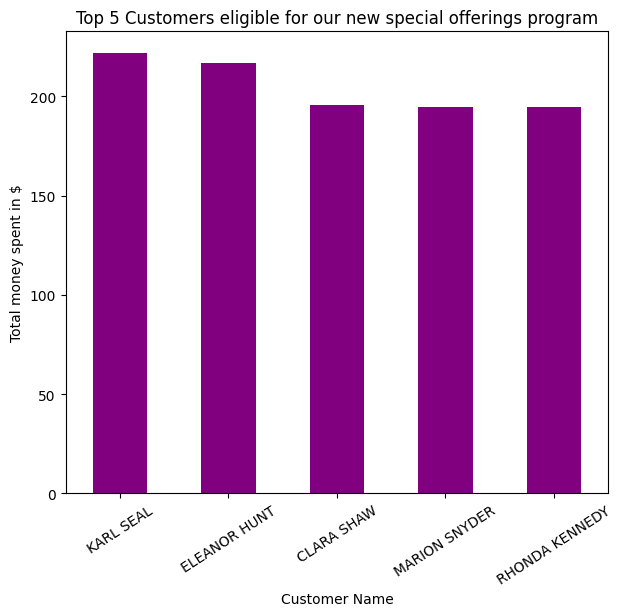

In [79]:
# Kod: Engelska
# Kommentarer: Svenska
# Task 2A - OOP plot


df_top_customers = con.sql("""
    SELECT c.first_name || ' ' || c.last_name AS full_name,
           SUM(p.amount) AS total
    FROM staging.customer c
    JOIN staging.rental r ON c.customer_id = r.customer_id
    JOIN staging.payment p ON r.rental_id = p.rental_id
    GROUP BY full_name
    ORDER BY total DESC
    LIMIT 5;
""").df()

# Skapa plotten direkt från DataFramen
ax = df_top_customers.plot(
    kind='bar',       # Stapeldiagram
    x='full_name',    # Hela namnet på X axel
    y='total',        # Totalen på Y axeln
    rot=33,           # 33 graders rotation på namnen för att inte krocka
    color='purple',   # Staplarnas färg
    legend=False,
    figsize=(7, 6)
)

# ax.set_relevant X Y Z etc
ax.set_title('Top 5 Customers eligible for our new special offerings program')
ax.set_xlabel('Customer Name')
ax.set_ylabel('Total money spent in $')

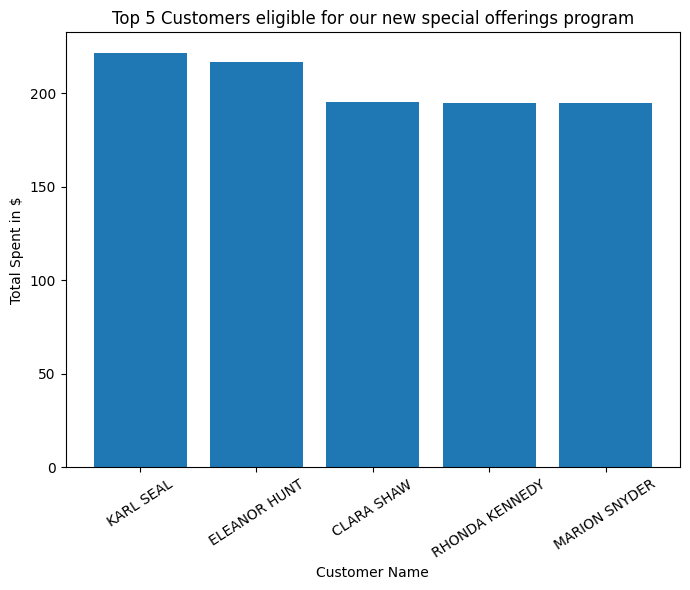

In [78]:
# Kod: Engelska
# Kommentarer: Svenska
# Task 2A - det "gamla sättet" med imports
import matplotlib.pyplot as plt

# Jag behöver EJ skriva hela min SQL-Query i denna cell, detta pga jag redan definerat df_top_customers i cellen ovan.
# DRY - Principen!


# Plotten 
plt.figure(figsize=(7, 6)) # Storlek på bilden
plt.bar(df_top_customers['full_name'], df_top_customers['total']) # Mina staplar
plt.title('Top 5 Customers eligible for our new special offerings program')
plt.xlabel('Customer Name') # Min label för X axeln == Kunders hela namn
plt.ylabel('Total Spent in $') # Min label för Y axeln == totalt spenderat i dollar
plt.xticks(rotation=33) # Graders rotation på kunders namn för att göra allting läsbart
plt.tight_layout()
plt.show()

### TASK 2B) 
- How much money does each film category bring in? 
- **Create a bar chart showing total revenue per film category.**

Text(0, 0.5, 'Revenue in $')

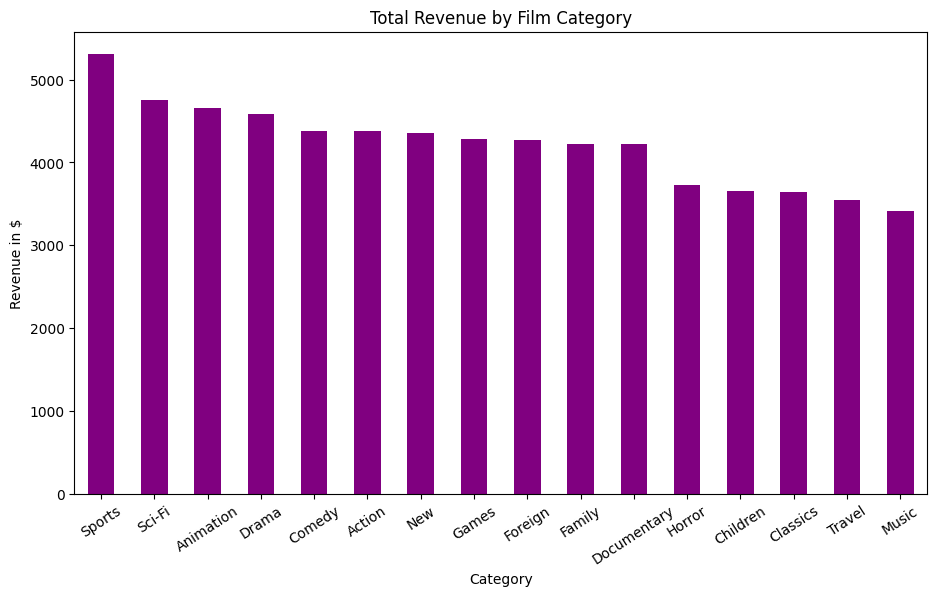

In [ ]:
# Kod: Engelska
# Kommentarer: Svenska
# Här kan jag återanvända all logik i min query.
# Se min TASK 1 F.1 lösning.


df_revenue = con.sql("""
    SELECT 
        c.name AS category, 
        SUM(p.amount) AS revenue
    FROM staging.category c
    JOIN staging.film_category fc ON c.category_id = fc.category_id
    JOIN staging.film f ON fc.film_id = f.film_id
    JOIN staging.inventory i ON f.film_id = i.film_id
    JOIN staging.rental r ON i.inventory_id = r.inventory_id
    JOIN staging.payment p ON r.rental_id = p.rental_id
    GROUP BY category
    ORDER BY revenue DESC;
""").df()



# Skapa plotten direkt från min DF
ax = df_revenue.plot(
    kind='bar',       # Stapeldiagram
    x='category',     # X axeln ska c.name alias category vara på
    y='revenue',      # Y axeln ska summan av totalen vara på
    color='purple',   # Färg på staplarna
    legend=False,     # Legend behövs ej
    rot=33,           # 33 graders lutning för läsbarhet
    figsize=(11, 6) 
)

ax.set_title('Total Revenue by Film Category') # Top rubrik
ax.set_xlabel('Category') # Rubrik för X axeln
ax.set_ylabel('Revenue in $') # Rubrik för Y axeln


#### Closing DB connection
**Following best practices by closing the DB connection in the end**

In [89]:
con.close()